
![](https://github.com/Vinicius999/EDA-IMDb-Top1000-Films/blob/main/images/IMDb_Header_image.jpg)

# **Análise Exploratória de Dados** 
***IMDb - TOP1000 Filmes***

---

### Importando e visualizando os dados

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_topfilmes = pd.read_csv('imdb_top_1000.csv')
df_topfilmes.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
df_topfilmes.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

#### Excluindo as colunas `Poster_Link` e `Overview`




In [ ]:
df_topfilmes = df_topfilmes.drop(['Poster_Link', 'Overview'], axis=1)

### Explorando os dados
Explorando os dados, percebemos que o `Released_Year`, `Runtime` e `Gross` estavam como `objeto` e decidimos converter para valores numéricos

In [ ]:
df_topfilmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 109.5+ KB


#### Discussão dos missings

In [ ]:
df_filmes_2019_2020 = df_topfilmes.loc[(df_topfilmes['Released_Year'] == 2020) | (df_topfilmes['Released_Year'] == 2019)]

df_filmes_2019_2020[['Released_Year', 'Series_Title', 'IMDB_Rating', 'Gross']].sort_values(by='Released_Year', ascending=False)

,Released_Year,Series_Title,IMDB_Rating,Gross
18,2020,Hamilton,8.6,NaN
20,2020,Soorarai Pottru,8.6,NaN
613,2020,Druk,7.8,NaN
612,2020,The Trial of the Chicago 7,7.8,NaN
205,2020,Soul,8.1,NaN
464,2020,Dil Bechara,7.9,NaN
466,2019,Marriage Story,7.9,2000000.0
882,2019,Just Mercy,7.6,NaN
879,2019,Once Upon a Time... in Hollywood,7.6,142502728.0
877,2019,Dark Waters,7.6,NaN


In [ ]:
df_topfilmes['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

#### Tratando e convertendo a coluna `Runtime`


In [ ]:
def convert_runtime(val: str) -> int:
    val = str(val).replace(' min', '')

    return int(val)


df_topfilmes['Runtime'] = df_topfilmes['Runtime'].apply(convert_runtime)

df_topfilmes.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


#### Tratando e convertendo a coluna `Gross`

In [ ]:
def convert_gross(val: str) -> float:
    val = str(val).replace(',', '')

    return float(val)


df_topfilmes['Gross'] = df_topfilmes['Gross'].apply(convert_gross)

df_topfilmes.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


#### Tratando a coluna `Released_Year`
Queriamos categorizar o ano mas existe um único valor não numérico chamado de `PG`

In [ ]:
df_topfilmes['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

Tratando o `Released_Year` com `PG` e convertendo

In [ ]:
df_topfilmes['Released_Year'] = df_topfilmes['Released_Year'].replace('PG', '1995')
df_topfilmes['Released_Year'] = df_topfilmes['Released_Year'].astype(int)

### Análise dos dados

In [ ]:
df_topfilmes.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.000000,1000.000000,843.000000,1.000000e+03,8.310000e+02
mean,1991.221000,122.891000,7.949300,77.971530,2.736929e+05,6.803475e+07
std,23.285669,28.093671,0.275491,12.376099,3.273727e+05,1.097500e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,70.000000,5.552625e+04,3.253559e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,2009.000000,137.000000,8.100000,87.000000,3.741612e+05,8.075089e+07
max,2020.000000,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


In [ ]:
df_topfilmes.corr()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,0.165873,-0.131152,-0.339279,0.241779,0.233178
Runtime,0.165873,1.000000,0.243096,-0.031452,0.173264,0.139671
IMDB_Rating,-0.131152,0.243096,1.000000,0.268531,0.494979,0.095923
Meta_score,-0.339279,-0.031452,0.268531,1.000000,-0.018507,-0.030587
No_of_Votes,0.241779,0.173264,0.494979,-0.018507,1.000000,0.574393
Gross,0.233178,0.139671,0.095923,-0.030587,0.574393,1.000000


Correlacões a serem destacadas:
- `Gross` x `Released_Year`
- `Gross` x `No_of_Votes`
- `No_of_Votes` x `Released_Year`
- `No_of_Votes` x `IMDB_Rating`
- `No_of_Votes` x `Meta_score`
- `Meta_score` x `Released_Year`
- `IMDB_Rating` x `Released_Year`
- `Meta_score` x `IMDB_Rating`
- `Runtime` x `IMDB_Rating`


#### Analise por ano

Anos com maior média de bilheteria

In [ ]:
df_topfilmes.groupby('Released_Year')[['Gross']].mean().sort_values(by='Gross', ascending=False).head()

,Gross
Released_Year,
2018,1.862684e+08
1977,1.646763e+08
2019,1.504214e+08
2012,1.210770e+08
2009,1.174868e+08


Top 5 filmes com maior bilheteria em 2018 e 2017

In [ ]:
df_filmes_2018_1977 = df_topfilmes.loc[(df_topfilmes['Released_Year'] == 2018) | (df_topfilmes['Released_Year'] == 1977)].sort_values(by='Gross', ascending=False)

df_filmes_2018_1977[[ 'Released_Year', 'Series_Title', 'Gross']].head()

,Released_Year,Series_Title,Gross
60,2018,Avengers: Infinity War,678815482.0
891,2018,Incredibles 2,608581744.0
722,2018,Deadpool 2,324591735.0
29,1977,Star Wars,322740140.0
725,2018,Mission: Impossible - Fallout,220159104.0


Anos com maior bilheteria no total



In [ ]:
df_topfilmes.groupby('Released_Year')[['Gross']].max().sort_values(by='Gross', ascending=False).head()

,Gross
Released_Year,
2015,936662225.0
2019,858373000.0
2009,760507625.0
2018,678815482.0
1997,659325379.0


Top 5 filmes com maior bilheteria em 2015 e 2019

In [ ]:
df_filmes_2015_2019 = df_topfilmes.loc[(df_topfilmes['Released_Year'] == 2015) | (df_topfilmes['Released_Year'] == 2019)].sort_values(by='Gross', ascending=False)

df_filmes_2015_2019[[ 'Released_Year', 'Series_Title', 'Gross']].head()

,Released_Year,Series_Title,Gross
477,2015,Star Wars: Episode VII - The Force Awakens,936662225.0
59,2019,Avengers: Endgame,858373000.0
596,2019,Toy Story 4,434038008.0
213,2015,Inside Out,356461711.0
33,2019,Joker,335451311.0


O filme com maior bilheteria, de acordo com o Dataset foi o `Star Wars: Episode VII`

In [ ]:
df_topfilmes.sort_values('Gross', ascending=False)[['Series_Title', 'Released_Year', 'Genre','Gross']].head()

,Series_Title,Released_Year,Genre,Gross
477,Star Wars: Episode VII - The Force Awakens,2015,"Action, Adventure, Sci-Fi",936662225.0
59,Avengers: Endgame,2019,"Action, Adventure, Drama",858373000.0
623,Avatar,2009,"Action, Adventure, Fantasy",760507625.0
60,Avengers: Infinity War,2018,"Action, Adventure, Sci-Fi",678815482.0
652,Titanic,1997,"Drama, Romance",659325379.0


Visualizando dados do filme

In [ ]:
# df_topfilmes.loc[df_topfilmes['Series_Title'] == 'Star Wars: Episode VII - The Force Awakens']
df_topfilmes.query('`Series_Title` == "Star Wars: Episode VII - The Force Awakens"')

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
477,Star Wars: Episode VII - The Force Awakens,2015,U,138,"Action, Adventure, Sci-Fi",7.9,80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0


Analisando outliers

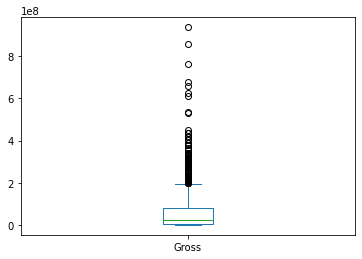

In [ ]:
df_topfilmes[['Gross']].plot(kind='box')

In [ ]:
df_topfilmes[['Gross']].describe()

,Gross
count,8.310000e+02
mean,6.803475e+07
std,1.097500e+08
min,1.305000e+03
25%,3.253559e+06
50%,2.353089e+07
75%,8.075089e+07
max,9.366622e+08


#### Analise por décadas

In [ ]:
df_topfilmes['Released_Year'] = pd.cut(df_topfilmes['Released_Year'], 10)

In [ ]:
df_topfilmes.rename(columns={'Released_Year': 'Decade'}, inplace = True)

In [ ]:
df_topfilmes.groupby('Decade').mean()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Decade,,,,,
"(1919.9, 1930.0]",91.750000,8.116667,94.000000,73236.666667,2.003314e+06
"(1930.0, 1940.0]",103.700000,7.976667,91.458333,91439.166667,1.764367e+07
"(1940.0, 1950.0]",108.030303,8.045455,92.647059,107338.303030,5.272820e+06
"(1950.0, 1960.0]",120.758065,8.037097,89.577778,118225.387097,1.437708e+07
"(1960.0, 1970.0]",127.461538,7.967692,82.345455,120809.800000,3.503963e+07
"(1970.0, 1980.0]",122.802469,7.986420,80.830986,230917.913580,5.821900e+07
"(1980.0, 1990.0]",121.134831,7.935955,76.475610,259697.056180,6.329478e+07
"(1990.0, 2000.0]",122.969136,7.964198,74.000000,354760.345679,5.933635e+07
"(2000.0, 2010.0]",123.439834,7.895436,73.818605,353113.634855,7.517349e+07


Décadas com maior bilheteria

In [ ]:
df_topfilmes.groupby('Decade')[['Gross']].max().sort_values(by='Gross', ascending=False)

,Gross
Decade,
"(2010.0, 2020.0]",936662225.0
"(2000.0, 2010.0]",760507625.0
"(1990.0, 2000.0]",659325379.0
"(1980.0, 1990.0]",435110554.0
"(1970.0, 1980.0]",322740140.0
"(1930.0, 1940.0]",198676459.0
"(1960.0, 1970.0]",163214286.0
"(1950.0, 1960.0]",93740000.0
"(1940.0, 1950.0]",23650000.0


Décadas com maior média de bilheteria

In [ ]:
df_topfilmes.groupby('Decade')[['Gross']].mean().sort_values(by='Gross', ascending=False)

,Gross
Decade,
"(2010.0, 2020.0]",1.026407e+08
"(2000.0, 2010.0]",7.517349e+07
"(1980.0, 1990.0]",6.329478e+07
"(1990.0, 2000.0]",5.933635e+07
"(1970.0, 1980.0]",5.821900e+07
"(1960.0, 1970.0]",3.503963e+07
"(1930.0, 1940.0]",1.764367e+07
"(1950.0, 1960.0]",1.437708e+07
"(1940.0, 1950.0]",5.272820e+06


#### Analise por gênero

Quais os grupos de gêneros que mais aparecem no top1000 filmes

In [ ]:
df_topfilmes['Genre'].value_counts()

Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: Genre, Length: 202, dtype: int64

In [ ]:
genre = df_topfilmes['Genre'].str.split(', ', expand=True).stack().to_frame(name='Genre')

genre.index = genre.index.droplevel(1)

Frequência de cada gênero entre os filmes

In [ ]:
genre.join(df_topfilmes['Series_Title']).groupby('Genre').count().sort_values('Series_Title', ascending=False)

,Series_Title
Genre,
Drama,724
Comedy,233
Crime,209
Adventure,196
Action,189
Thriller,137
Romance,125
Biography,109
Mystery,99


Top filmes de `Drama`




In [ ]:
df_topfilmes.loc[df_topfilmes['Genre'] == 'Drama'].sort_values(by='IMDB_Rating').head()[['Series_Title', 'Decade', 'IMDB_Rating', 'Meta_score', 'Gross']]

,Series_Title,Decade,IMDB_Rating,Meta_score,Gross
981,On Golden Pond,"(1980.0, 1990.0]",7.6,68.0,119285432.0
880,Nelyubov,"(2010.0, 2020.0]",7.6,86.0,566356.0
881,The Florida Project,"(2010.0, 2020.0]",7.6,92.0,5904366.0
883,Gifted,"(2010.0, 2020.0]",7.6,60.0,24801212.0
886,Mustang,"(2010.0, 2020.0]",7.6,83.0,845464.0


Top filmes de `Drama, Romance`

In [ ]:
df_topfilmes.loc[df_topfilmes['Genre'] == 'Drama, Romance'].sort_values(by='IMDB_Rating').head()[['Series_Title', 'Decade', 'IMDB_Rating', 'Meta_score', 'Gross']]

,Series_Title,Decade,IMDB_Rating,Meta_score,Gross
965,The Bridges of Madison County,"(1990.0, 2000.0]",7.6,69.0,71516617.0
962,Sense and Sensibility,"(1990.0, 2000.0]",7.6,84.0,43182776.0
905,Hævnen,"(2000.0, 2010.0]",7.6,65.0,1008098.0
857,Belle de jour,"(1960.0, 1970.0]",7.7,NaN,26331.0
773,Brokeback Mountain,"(2000.0, 2010.0]",7.7,87.0,83043761.0


Top filmes de `'Comedy, Drama'`

In [ ]:
df_topfilmes.loc[df_topfilmes['Genre'] == 'Comedy, Drama'].sort_values(by='IMDB_Rating').head()[['Series_Title', 'Decade', 'IMDB_Rating', 'Meta_score', 'Gross']]

,Series_Title,Decade,IMDB_Rating,Meta_score,Gross
978,"Planes, Trains & Automobiles","(1980.0, 1990.0]",7.6,72.0,49530280.0
879,Once Upon a Time... in Hollywood,"(2010.0, 2020.0]",7.6,83.0,142502728.0
945,The Royal Tenenbaums,"(2000.0, 2010.0]",7.6,76.0,52364010.0
937,The Station Agent,"(2000.0, 2010.0]",7.6,81.0,5739376.0
830,Withnail & I,"(1980.0, 1990.0]",7.7,84.0,1544889.0


Faturamento médio por gênero

In [ ]:
genre.join(df_topfilmes['Gross']).groupby('Genre').mean().sort_values('Gross', ascending=False)

,Gross
Genre,
Adventure,1.657313e+08
Sci-Fi,1.480264e+08
Action,1.412393e+08
Animation,1.279675e+08
Fantasy,1.086168e+08
Family,9.293266e+07
Comedy,6.412530e+07
Thriller,5.867663e+07
History,5.553953e+07


Faturamento total por gênero

In [ ]:
genre.join(df_topfilmes['Gross']).groupby('Genre').sum().sort_values('Gross', ascending=False)

,Gross
Genre,
Adventure,2.817432e+10
Drama,2.749762e+10
Action,2.203333e+10
Comedy,1.224793e+10
Sci-Fi,9.029610e+09
Animation,8.573824e+09
Crime,6.956304e+09
Thriller,6.454429e+09
Fantasy,6.082543e+09


Diretor com a maior média de receita nos filmes

In [ ]:
df_topfilmes.groupby('Director').mean().sort_values('Gross', ascending=False)

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Director,,,,,
Anthony Russo,153.250000,8.075000,72.75,761065.750000,5.512599e+08
Gareth Edwards,133.000000,7.800000,65.00,556608.000000,5.321773e+08
J.J. Abrams,132.333333,7.833333,78.00,633782.333333,4.743903e+08
Josh Cooley,100.000000,7.800000,84.00,203177.000000,4.340380e+08
Roger Allers,88.000000,8.500000,88.00,942045.000000,4.227838e+08
...,...,...,...,...,...
Yavuz Turgul,128.000000,8.200000,NaN,64118.000000,NaN
Yilmaz Erdogan,110.000000,8.000000,NaN,33592.000000,NaN
Yoshifumi Kondô,111.000000,7.900000,75.00,51943.000000,NaN


#### Combinações de dados

Qual a combinação de diretor e protagonista mais rentável em média?

In [ ]:
df_topfilmes.groupby(['Director','Star1']).mean().sort_values('Gross', ascending=False)[['Gross']].head(10)

Gross
Director         Star1                          
J.J. Abrams      Daisy Ridley       9.366622e+08
James Cameron    Sam Worthington    7.605076e+08
                 Leonardo DiCaprio  6.593254e+08
Joss Whedon      Robert Downey Jr.  6.232795e+08
Anthony Russo    Joe Russo          5.512599e+08
Gareth Edwards   Felicity Jones     5.321773e+08
Steven Spielberg Henry Thomas       4.351106e+08
Brad Bird        Craig T. Nelson    4.350114e+08
Josh Cooley      Tom Hanks          4.340380e+08
Roger Allers     Rob Minkoff        4.227838e+08

Qual a combinação de diretor e protagonista principal que os críticos mais amaram em média?

In [ ]:
df_topfilmes.groupby(['Director','Star1']).mean().sort_values('Meta_score', ascending=False)[['Meta_score']].head(10)

,,Meta_score
Director,Star1,
Richard Linklater,Ellar Coltrane,100.0
Bernardo Bertolucci,Jean-Louis Trintignant,100.0
Alexander Mackendrick,Burt Lancaster,100.0
Francis Ford Coppola,Marlon Brando,100.0
David Lean,Peter O'Toole,100.0
Orson Welles,Orson Welles,100.0
Michael Curtiz,Humphrey Bogart,100.0
Ingmar Bergman,Bertil Guve,100.0
Alfred Hitchcock,Cary Grant,99.0


Qual a combinação de diretor e protagonista principal que o público mais amou em média?

In [ ]:
df_topfilmes.groupby(['Director','Star1']).mean().sort_values('IMDB_Rating', ascending=False)[['IMDB_Rating']].head(10)

,,IMDB_Rating
Director,Star1,
Frank Darabont,Tim Robbins,9.3
Francis Ford Coppola,Marlon Brando,9.2
Sidney Lumet,Henry Fonda,9.0
Steven Spielberg,Liam Neeson,8.9
Quentin Tarantino,John Travolta,8.9
Christopher Nolan,Leonardo DiCaprio,8.8
Peter Jackson,Elijah Wood,8.8
Milos Forman,Jack Nicholson,8.7
Lana Wachowski,Lilly Wachowski,8.7


Quais diretores e protagonistas principais mais trabalharam juntos?

In [ ]:
df_topfilmes.groupby(['Director','Star1'])['Director'].count().nlargest(10)

Director           Star1          
Akira Kurosawa     Toshirô Mifune     7
Charles Chaplin    Charles Chaplin    6
Joel Coen          Ethan Coen         6
Martin Scorsese    Robert De Niro     6
Anthony Russo      Joe Russo          4
Christopher Nolan  Christian Bale     4
Clint Eastwood     Clint Eastwood     4
John Huston        Humphrey Bogart    4
Richard Linklater  Ethan Hawke        4
Woody Allen        Woody Allen        4
Name: Director, dtype: int64

Quais protagonistas principais e secundários mais trabalharam juntos?

In [ ]:
df_topfilmes.groupby(['Star1','Star2'])['Star1'].count().nlargest(10)

Star1                  Star2           
Daniel Radcliffe       Emma Watson         5
Ethan Hawke            Julie Delpy         3
Mark Hamill            Harrison Ford       3
Tom Hanks              Tim Allen           3
Woody Allen            Diane Keaton        3
Al Pacino              Robert De Niro      2
Arnold Schwarzenegger  Linda Hamilton      2
Charles Chaplin        Paulette Goddard    2
Chris Pine             Zachary Quinto      2
Elijah Wood            Ian McKellen        2
Name: Star1, dtype: int64

Quais 4 protagonistas mais trabalharam juntos?

In [ ]:
df_topfilmes.groupby(['Star1','Star2','Star3','Star4'])['Star1'].count().nlargest(10)

Star1                 Star2           Star3               Star4             
Daniel Radcliffe      Emma Watson     Rupert Grint        Michael Gambon        2
Mark Hamill           Harrison Ford   Carrie Fisher       Billy Dee Williams    2
Aamir Khan            Anushka Sharma  Sanjay Dutt         Boman Irani           1
                      Madhavan        Mona Singh          Sharman Joshi         1
                      Raghuvir Yadav  Gracy Singh         Rachel Shelley        1
                      Saif Ali Khan   Akshaye Khanna      Preity Zinta          1
                      Sakshi Tanwar   Fatima Sana Shaikh  Sanya Malhotra        1
                      Salman Khan     Raveena Tandon      Karisma Kapoor        1
                      Soha Ali Khan   Siddharth           Sharman Joshi         1
Aaron Taylor-Johnson  Nicolas Cage    Chloë Grace Moretz  Garrett M. Brown      1
Name: Star1, dtype: int64

Quais gêneros os diretores mais preferem trabalhar?

In [ ]:
genre.join(df_topfilmes['Director']).groupby(['Director','Genre'])['Director'].count().nlargest(10)

Director          Genre    
Hayao Miyazaki    Animation    11
Akira Kurosawa    Drama         9
Alfred Hitchcock  Mystery       9
                  Thriller      9
Hayao Miyazaki    Adventure     9
Martin Scorsese   Drama         9
Billy Wilder      Drama         8
David Fincher     Drama         8
Martin Scorsese   Crime         8
Woody Allen       Comedy        8
Name: Director, dtype: int64

Quais gêneros os protagonistas principais mais preferem trabalhar?

In [ ]:
genre.join(df_topfilmes['Star1']).groupby(['Star1','Genre'])['Star1'].count().nlargest(10)

Star1              Genre 
Robert De Niro     Drama     11
Al Pacino          Drama     10
                   Crime      9
Robert De Niro     Crime      8
Tom Hanks          Drama      8
Denzel Washington  Drama      7
Johnny Depp        Drama      7
Leonardo DiCaprio  Drama      7
Aamir Khan         Drama      6
Charles Chaplin    Comedy     6
Name: Star1, dtype: int64

![](https://github.com/Vinicius999/EDA-IMDb-Top1000-Films/blob/main/images/Star-Wars-VII-image.png)